# Querying and Analyzing Baseball Payrolls

In SQL and Python, query data from Lahman's Baseball Database, create visualizations in Python, and analyze the data. Used numpy, pandas, seaborn, and matplotlib for visualizations.

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

db = sql.connect("baseball.sqlite")

In [2]:
#1

pd.read_sql(
    """
    select S.yearID, S.teamID, T.name, sum(S.salary) as payroll
    from Salaries as S
    inner join Teams as T
    on S.teamID = T.teamID
    where S.yearID between 2006 and 2016
    and T.yearID between 2006 and 2016
    group by S.yearID, S.teamID
    order by payroll desc
    """, db).head(10)

,yearID,teamID,name,payroll
0,2013,NYA,New York Yankees,2551767746
1,2013,LAN,Los Angeles Dodgers,2456984156
2,2016,NYA,New York Yankees,2452975712
3,2016,LAN,Los Angeles Dodgers,2434172180
4,2014,LAN,Los Angeles Dodgers,2387160600
5,2015,LAN,Los Angeles Dodgers,2373712000
6,2015,NYA,New York Yankees,2340271527
7,2008,NYA,New York Yankees,2286864679
8,2010,NYA,New York Yankees,2269667279
9,2011,NYA,New York Yankees,2225025308


The five teams with the highest payrolls are the New York Yankees, LA Dodgers, Detroit Tigers, Boston Red Sox, and Philadelphia Phillies.

In [3]:
#2
# compute payrolls, per team, per year

payrolls = pd.read_sql(
    """
    select yearID, teamID, sum(salary) as payroll
    from Salaries
    where yearID between 2006 and 2016
    group by yearID, teamID
    """, db)
payrolls.head(10)

,yearID,teamID,payroll
0,2006,ARI,59684226
1,2006,ATL,90156876
2,2006,BAL,72585582
3,2006,BOS,120099824
4,2006,CHA,102750667
5,2006,CHN,94424499
6,2006,CIN,60909519
7,2006,CLE,56031500
8,2006,COL,41233000
9,2006,DET,82612866


C:\Users\natha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Payroll in dollars')

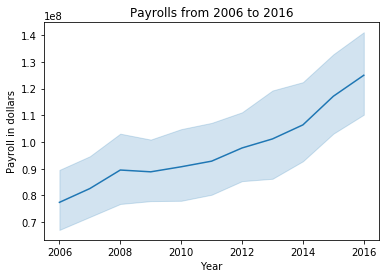

In [4]:
ax = sns.lineplot("yearID", "payroll", data = payrolls)
ax.set_title("Payrolls from 2006 to 2016")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll in dollars")

From 2006 to 2016, there is a clear upward trend in the team payroll.

Text(0, 0.5, 'Payroll in dollars')

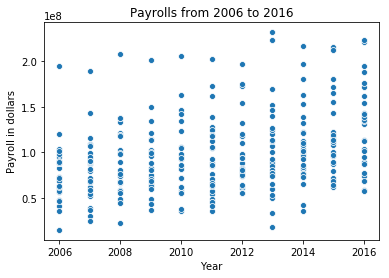

In [5]:
#3

ax = sns.scatterplot("yearID", "payroll", data = payrolls)
ax.set_title("Payrolls from 2006 to 2016")
ax.set_xlabel("Year")
ax.set_ylabel("Payroll in dollars")

Investigate two anomalies: the two super high payrolls in 2013.

In [6]:
pd.read_sql(
    """
    select yearID, teamID, sum(salary) as payroll
    from Salaries
    where yearID == 2013
    group by yearID, teamID
    order by payroll desc
    """, db).head(10)

,yearID,teamID,payroll
0,2013,NYA,231978886
1,2013,LAN,223362196
2,2013,PHI,169863189
3,2013,BOS,151530000
4,2013,DET,145989500
5,2013,SFN,140180334
6,2013,TOR,126288100
7,2013,LAA,124174750
8,2013,CHA,120065277
9,2013,WAS,113703270


In [7]:
pd.read_sql(
    """
    select S.yearID, S.teamID, T.name, sum(S.salary) as payroll
    from Salaries as S
    inner join Teams as T
    on S.teamID = T.teamID
    where S.yearID == 2013
    and T.yearID == 2013
    group by S.yearID, S.teamID
    order by payroll desc
    """, db).head(10)

,yearID,teamID,name,payroll
0,2013,NYA,New York Yankees,231978886
1,2013,LAN,Los Angeles Dodgers,223362196
2,2013,PHI,Philadelphia Phillies,169863189
3,2013,BOS,Boston Red Sox,151530000
4,2013,DET,Detroit Tigers,145989500
5,2013,SFN,San Francisco Giants,140180334
6,2013,TOR,Toronto Blue Jays,126288100
7,2013,LAA,Los Angeles Angels of Anaheim,124174750
8,2013,CHA,Chicago White Sox,120065277
9,2013,WAS,Washington Nationals,113703270


The two times with strangely high payrolls in 2013 were the New York Yankees and Los Angeles Dodgers. Here is an article from 2013 talking about the payrolls:

https://deadspin.com/2013-payrolls-and-salaries-for-every-mlb-team-462765594

The author of the article laughs at the Yankees for spending so much. My friend, who follows sports, informed me that these two teams specifically spend more than other teams because they have big TV deals, large merchandise sales, and historically large followings. Here is another article talking about the two teams:

https://www.businessinsider.com/dodgers-and-yankees-will-meet-next-year-in-what-may-be-the-most-expensive-matchup-in-sports-history-2012-8

Both the Yankees and Dodgers gave high-paying contracts to their players in 2013. The Dodgers, in several record-breaking multi-million dollar deals, signed on Carl Crawford, Adrian Gonzalez, and Josh Beckett, each receiving 20 million, 21 million, and 17 million dollars respectively.

In [8]:
#4

top5 = pd.read_sql(
    """
    select yearID, teamID, sum(salary) as payroll
    from Salaries
    where yearID between 2006 and 2016
    and teamID in ("NYA", "LAN", "DET", "BOS", "PHI")
    group by yearID, teamID
    """, db)
top5.head(10)

,yearID,teamID,payroll
0,2006,BOS,120099824
1,2006,DET,82612866
2,2006,LAN,98447187
3,2006,NYA,194663079
4,2006,PHI,88273333
5,2007,BOS,143026214
6,2007,DET,94800369
7,2007,LAN,108454524
8,2007,NYA,189259045
9,2007,PHI,89428213


In [9]:
len(payrolls["teamID"].unique())
# there are 31 unique teams
# 26 teams are not in the top 5

31

In [10]:
non_top5 = pd.read_sql(
    """
    select yearID, sum(salary) / 26 as payroll
    from Salaries
    where yearID between 2006 and 2016
    and teamID not in ("NYA", "LAN", "DET", "BOS", "PHI")
    group by yearID
    """, db)
non_top5.head(10)
# average payroll for all the teams that are not in the top 5

,yearID,payroll
0,2006,66822166
1,2007,71220023
2,2008,76516085
3,2009,77439539
4,2010,76631839
5,2011,78369314
6,2012,83117298
7,2013,81223149
8,2014,88651489
9,2015,100789133


In [11]:
non_top5["teamID"] = "non_top5"
non_top5.head(10)

,yearID,payroll,teamID
0,2006,66822166,non_top5
1,2007,71220023,non_top5
2,2008,76516085,non_top5
3,2009,77439539,non_top5
4,2010,76631839,non_top5
5,2011,78369314,non_top5
6,2012,83117298,non_top5
7,2013,81223149,non_top5
8,2014,88651489,non_top5
9,2015,100789133,non_top5


In [12]:
top5 = top5.append(non_top5, sort = False)
top5.head(10)

,yearID,teamID,payroll
0,2006,BOS,120099824
1,2006,DET,82612866
2,2006,LAN,98447187
3,2006,NYA,194663079
4,2006,PHI,88273333
5,2007,BOS,143026214
6,2007,DET,94800369
7,2007,LAN,108454524
8,2007,NYA,189259045
9,2007,PHI,89428213


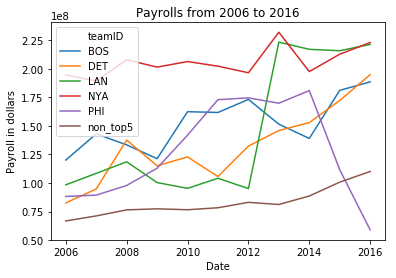

In [13]:
ax = sns.lineplot("yearID", "payroll", data = top5, hue = "teamID")
ax.set_title("Payrolls from 2006 to 2016")
ax.set_xlabel("Date")
ax.set_ylabel("Payroll in dollars")
ax

The top 5 teams have much higher payrolls compared to the average payrolls of the teams not in the top 5. The New York Yankees payroll has stayed consistently high. The LA Dodgers payroll shot up in 2013. The top 5 teams' payrolls are consistently higher than the average non-top 5 team payroll (except for the Philadephia Phillies starting in around 2015.)

The other top 5 teams' payrolls have been rising (except for the Phillies, which dropped from 2014 to 2016) at a faster pace than the average of the other teams' payrolls.

# My Own Questions

# Question 1: How is a player's game performance related to their salary?

I will judge a player's performance with a performance indicator value (PI), which will be the sum of a player's runs, hits, doubles, triples, and stolen bases.

In [14]:
performance = pd.read_sql(
    """
    select S.yearID, S.playerID, S.salary, (B.R + B.H + B.SB + B.HR + B.RBI + B."2B" + B."3B") as PI
    from Salaries as S
    inner join Batting as B
    on S.playerID = B.playerID and S.yearID = B.yearID
    """, db)
performance.head(10)

,yearID,playerID,salary,PI
0,1985,barkele01,870000,0.0
1,1985,bedrost01,550000,9.0
2,1985,benedbr01,545000,80.0
3,1985,campri01,633333,7.0
4,1985,ceronri01,625000,113.0
5,1985,chambch01,800000,87.0
6,1985,dedmoje01,150000,2.0
7,1985,forstte01,483333,0.0
8,1985,garbege01,772000,3.0
9,1985,harpete01,250000,303.0


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 9]

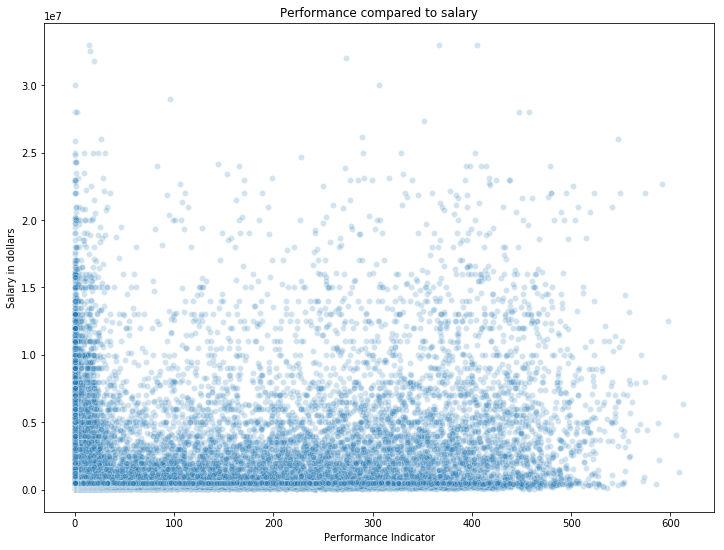

In [16]:
ax = sns.scatterplot("PI", "salary", data = performance, alpha = 0.2)
ax.set(title = "Performance compared to salary",
       xlabel = "Performance Indicator",
       ylabel = "Salary in dollars")
ax

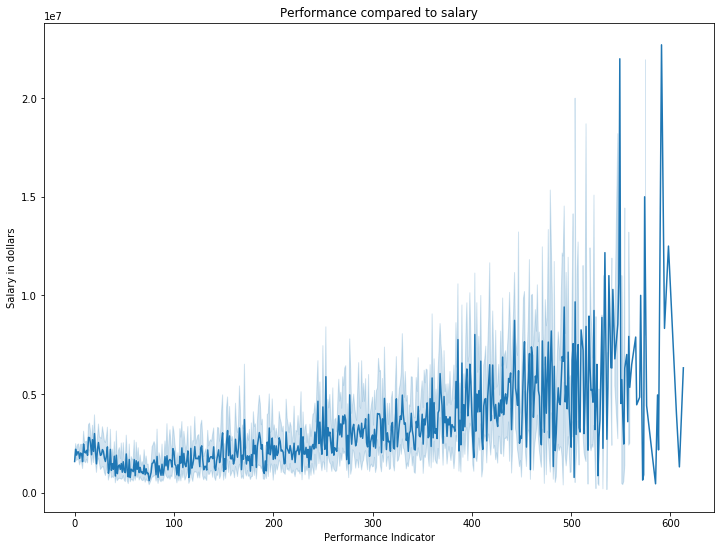

In [17]:
ax = sns.lineplot("PI", "salary", data = performance)
ax.set(title = "Performance compared to salary",
       xlabel = "Performance Indicator",
       ylabel = "Salary in dollars")
ax

Create bins represent scores that are close together:

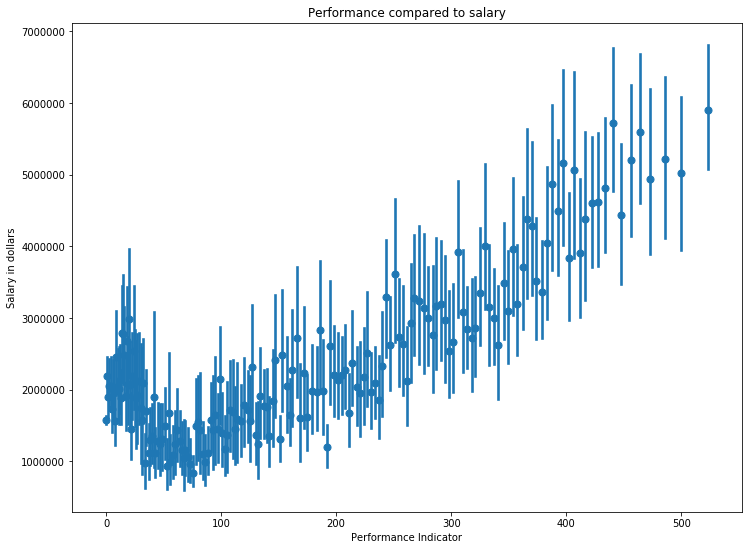

In [18]:
ax = sns.regplot("PI", "salary", data = performance, x_bins = 300, fit_reg = False)
ax.set(title = "Performance compared to salary",
       xlabel = "Performance Indicator",
       ylabel = "Salary in dollars")
ax

It looks like as performance increases, the salary also increases. There is a slight bump at the beginning, indicating a higher salary, but low PI's. This might be from high-salary pitchers because my PI only accounts for batting indicators (although, I'm unsure if pitchers are included in the batting table). As seen in the scatter plot, there are a lot of players with a PI close to 0, but with high salaries, so either the data is unavailable or these high-cost players were not batters.

It also seems that as performance increases, the variation in salary increases; at the top end of the performance indicator, there are players who are paid a lot, while others are paid as much as those with low PI scores. One could summarize this observation by saying, if a player is paid more, they are good at batting, but if a player is good at batting, there is no guarantee they are paid more.

It makes sense that as performance increases, salary also increases: obviously, better players are worth more, and teams are willing to pay these players more money.

# Question 2: Does a team who spends more (has a larger payroll) do better than teams who spend less?

In [19]:
win_rate = pd.read_sql(
    """
    select S.yearID, S.teamID, sum(S.salary) as payroll, (T.W * 1.0 / T.G) as win_rate
    from Salaries as S
    inner join Teams as T
    on S.teamID = T.teamID
    group by S.yearID, S.teamID
    """, db)
win_rate.head(10)

# converting to decimal: https://stackoverflow.com/questions/8305613/converting-int-to-real-in-sqlite

,yearID,teamID,payroll,win_rate
0,1985,ATL,784771000,0.467290
1,1985,BAL,751446280,0.561905
2,1985,BOS,1285912080,0.546296
3,1985,CAL,461692608,0.463636
4,1985,CHA,1161849004,0.509434
5,1985,CHN,1816517131,0.433333
6,1985,CIN,1078429293,0.611111
7,1985,CLE,773096588,0.504854
8,1985,DET,1221080874,0.550459
9,1985,HOU,569603907,0.554545


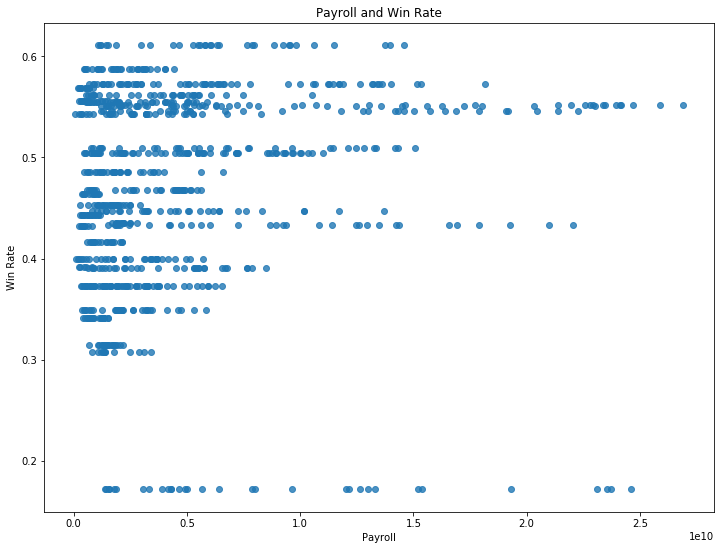

In [20]:
ax = sns.regplot("payroll", "win_rate", data = win_rate, fit_reg = False)
ax.set(title = "Payroll and Win Rate",
      xlabel = "Payroll",
      ylabel = "Win Rate")
ax

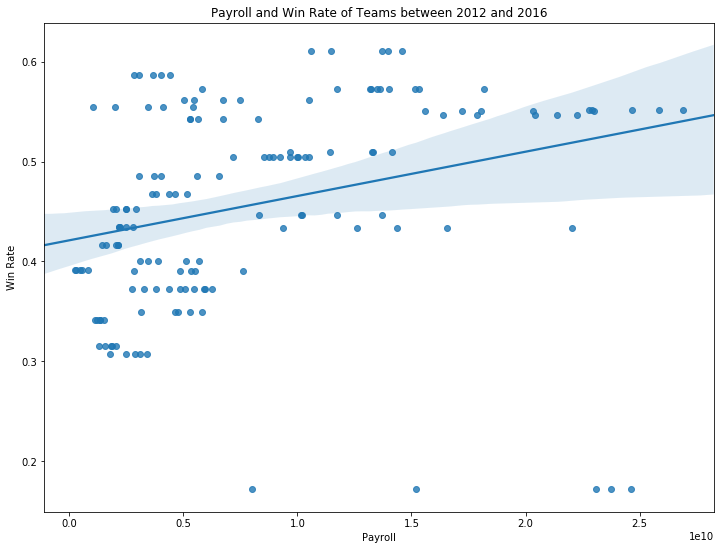

In [21]:
win_rate2016 = pd.read_sql(
    """
    select S.yearID, S.teamID, sum(S.salary) as payroll, (T.W * 1.0 / T.G) as win_rate
    from Salaries as S
    inner join Teams as T
    on S.teamID = T.teamID
    where S.yearID between 2012 and 2016
    group by S.yearID, S.teamID
    """, db)
ax = sns.regplot("payroll", "win_rate", data = win_rate2016)
ax.set(title = "Payroll and Win Rate of Teams between 2012 and 2016",
      xlabel = "Payroll",
      ylabel = "Win Rate")
ax

There is a very interesting relationship between payroll and win rate. Looking at the first plot, it's very hard to distinguish a relationship: it seems that a team that has a small payroll may or may not do just as poorly as a team with a high payroll. As the payroll increases, there are win rates all across the board.

In the second graph, I limited the data to be within 2012 and 2016, where the money has approximately the same value and where the baseball culture is similar. It's much easier to see a relationship (although, there are a few outliers). A team with a small payroll can do either good or bad, but as the payroll gets bigger, the team is more likely to do better.

Strangely, there is a team that does consistently poorly...

In [22]:
pd.read_sql(
    """
    select S.yearID, S.teamID, sum(S.salary) as payroll, (T.W * 1.0 / T.G) as win_rate
    from Salaries as S
    inner join Teams as T
    on S.teamID = T.teamID
    where S.yearID between 2012 and 2016
    and win_rate < 0.2
    group by S.yearID, S.teamID
    """, db)

,yearID,teamID,payroll,win_rate
0,2012,PHI,174538938,0.171717
1,2012,PIT,62951999,0.166667
2,2013,PHI,169863189,0.171717
3,2013,PIT,77062000,0.166667
4,2014,PHI,180944967,0.171717
5,2014,PIT,77178000,0.166667
6,2015,PHI,111693000,0.171717
7,2015,PIT,88892499,0.166667
8,2016,PHI,58980000,0.171717
9,2016,PIT,103778833,0.166667


It looks like the Philadelphia Phillies are just bad, even though they spend a lot of money. As explained in 1.1.3, a team may spend a lot of money because fans will spend a lot of money in return: while the team is not good at the sport, they still make money, which is the important thing in the MLB business. (That was sarcastic.)

# Question 3: Is payroll related to the success of home games?

In [23]:
home = pd.read_sql(
    """
    select S.yearID, S.teamID, sum(S.salary) as payroll, H.attendance / H.games as people_per_game
    from Salaries as S
    inner join HomeGames as H
    on S.teamID = H.team_key and S.yearID = H.year_key
    group by S.yearID, S.teamID
    """, db)
home = home[home["people_per_game"] != 0]
home.head(10)

,yearID,teamID,payroll,people_per_game
0,1985,ATL,14807000,16667
1,1985,BAL,11560712,26388
2,1985,BOS,10897560,22055
3,1985,CAL,14427894,32503
4,1985,CHA,9846178,20616
5,1985,CHN,12702917,26685
6,1985,CIN,8359917,22649
7,1985,CLE,6551666,8088
8,1985,DET,10348143,28229
9,1985,HOU,9993051,14622


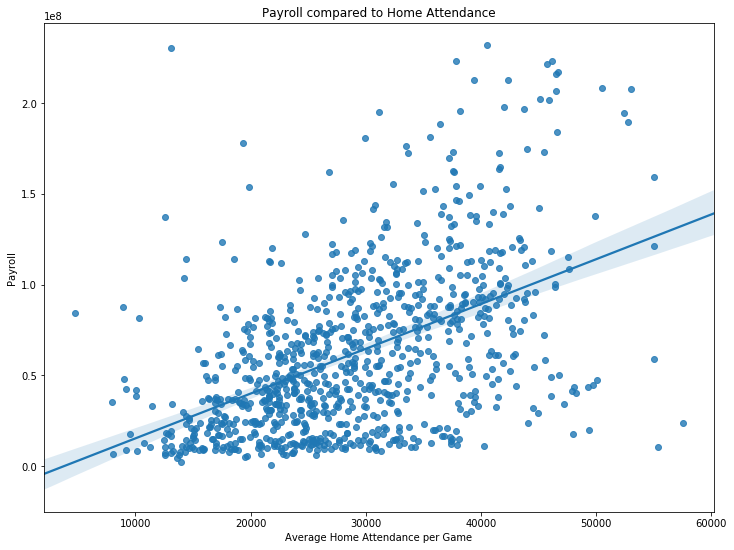

In [24]:
ax = sns.regplot("people_per_game", "payroll", data = home)
ax.set(title = "Payroll compared to Home Attendance",
      xlabel = "Average Home Attendance per Game",
      ylabel = "Payroll")
ax

I'll measure attendance by dividing the total attendance of all home games by the number of all home games played.

Based on the plot, it seems clear that as attendance increases, the teams' payroll also increases: this makes sense because teams with larger audiences are willing to spend more; there is a guaranteed return on investment.

It seems that high payroll teams are very likely to have high average attendance per home game, while a low payroll team will have attendance rates all across the board.

A team is only willing to spend a lot of money if they know they have a fanbase that supports them and who will pay to attend the game. A team with a smaller payroll might not have the confidence to spend more on players, but if they do really well during the season, attendance might spike up in the season. If they do poorly, the attendance might stay low.

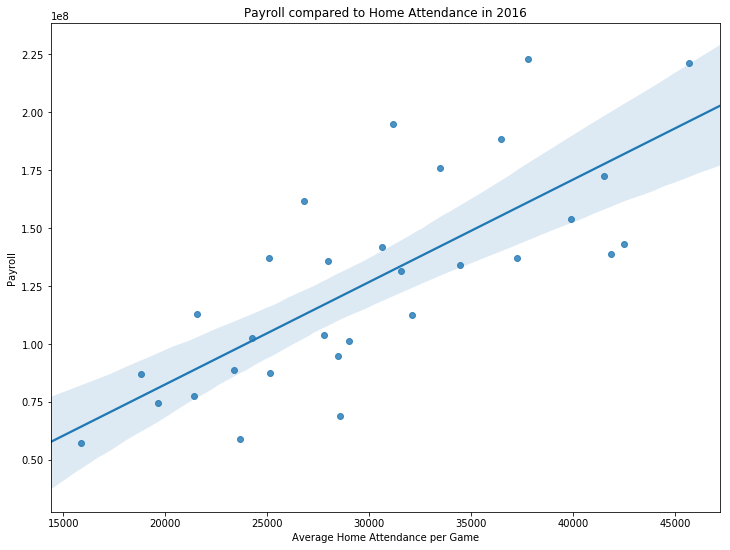

In [25]:
home2016 = pd.read_sql(
    """
    select S.yearID, S.teamID, sum(S.salary) as payroll, H.attendance / H.games as people_per_game
    from Salaries as S
    inner join HomeGames as H
    on S.teamID = H.team_key and S.yearID = H.year_key
    where S.yearID = 2016
    group by S.yearID, S.teamID
    """, db)
home2016 = home2016[home2016["people_per_game"] != 0]
ax = sns.regplot("people_per_game", "payroll", data = home2016)
ax.set(title = "Payroll compared to Home Attendance in 2016",
      xlabel = "Average Home Attendance per Game",
      ylabel = "Payroll")
ax

This conclusion is reinforced when looking at attendance in only one year: the positive relationship is very clear.